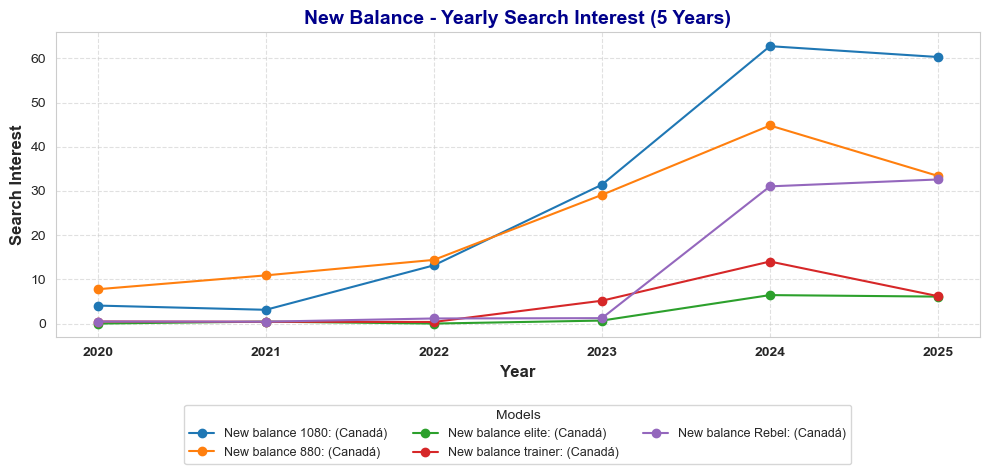

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv("data/nb popular 5y CA.csv", skiprows=1)
df.rename(columns={df.columns[0]: "Semana"}, inplace=True)
df["Semana"] = pd.to_datetime(df["Semana"], errors='coerce')
df["Year"] = df["Semana"].dt.year
df_yearly = df.groupby("Year").mean(numeric_only=True).reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
palette = sns.color_palette("tab10", len(df_yearly.columns[1:]))

for idx, col in enumerate(df_yearly.columns[1:]):
    plt.plot(df_yearly["Year"], df_yearly[col], marker="o", label=col, color=palette[idx])

plt.title("New Balance - Yearly Search Interest (5 Years)", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Search Interest", fontsize=12, fontweight="bold")
plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Models", fontsize=9, loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.tight_layout()
plt.savefig("charts/nb_yearly_trends.png", dpi=300)
plt.show()
